<!-- Assignment 2 - WS 2023 -->

# Multilayer Perceptrons (21 points + 2 bonus)

This notebook contains the second assignment for the exercises in Deep Learning and Neural Nets 1.
It provides a skeleton, i.e. code with gaps, that will be filled out by you in different exercises.
All exercise descriptions are visually annotated by a vertical bar on the left and some extra indentation.
Any questions that are not part of the exercise statement do not need to be answered,
but should rather be interpreted as triggers to guide your thought process.

**Note**: The cells in the introductory part (before the first subtitle)
perform all necessary imports and provide utility function that should work without problems.
Please, do not alter this code or add extra import statements in your submission!

<span style="color:#d95c4c">**IMPORTANT:**</span> Please, change the name of your submission file so that it contains your student ID!

In this assignment, the goal is to get familiar with **Multi-Layer Perceptrons**. Essentially, MLPs are the result of stacking one or more of the simple networks from last time, interleaved with some form of non-linearities. This hints at some form of modular implementation, which will lead to the first building blocks of your very own deep learning library.

In [1]:
import numpy as np

from nnumpy import Module, Container, LossFunction
from nnumpy.testing import gradient_check
from nnumpy.utils import to_one_hot

rng = np.random.default_rng(1856)

## Module System

Multi-layer perceptrons can essentially be assembled from simple networks and activation functions. This kind of modularity is a recurring theme in deep learning, so much so that most deep learning frameworks are implemented in a modular fashion. This allows to construct complex networks from relatively simple building blocks. On top of that, it breaks down the possibly complex backprop derivation in more digestible pieces.

In order to kick-start your deep learning library, we provide you with the `Module` class, which implements some plumbing and python magic in an attempt to make them easier to use. In order for your models to inherit this functionality, they should be subclasses of `Module` and implement the functions `compute_outputs` and `compute_grads`. The first function should compute the result of the forward pass and collect the values that will be necessary to compute the gradients in the backward pass. The backward pass is to be implemented in the second function, which comes down to computing all possible gradients. The following schematic illustrates this idea.

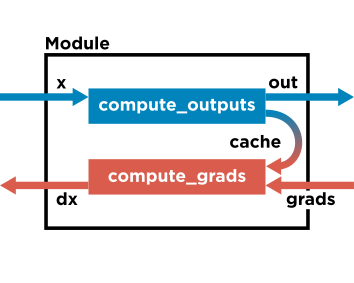

Concretely, `compute_outputs` takes one or more inputs and should return two values: the output of the module from the input and the `cache`, which contains the values necessary for the backward pass. `compute_grads` expects the gradients from the module that uses the outputs from this module as inputs, as well as the `cache` from the forward pass as inputs. This function should compute the gradients w.r.t. the module's parameters, but also the gradients w.r.t. inputs, which are to be returned by `compute_grads`. See the example module `Example` below.

In [2]:
class Square(Module):
    """ Example of what a NNumpy module could look like. """
        
    def compute_outputs(self, x):
        return x * x, x
    
    def compute_grads(self, grads, x):
        return grads * 2 * x

### Exercise 1: Activation Function Module (6 Points)

Without non-linearities, Multi-Layer Perceptrons would make little sense. After all, multiple linear layers can always be reduced to a single-layer linear network, i.e. linear regression. Essentially any non-linear function could serve as activation function, but in practice only a few functions with specific properties are considered.

An example of a function that *could* be used as activation function, but is rarely found in practice, is the following algebraic formulation of a sigmoidal function:

$$\sigma_\mathrm{alg}(x) = \frac{x}{\sqrt{1 + x^2}}.$$

When plotted, this function looks very similar to the more commonly used $\tanh$.
Although it is not a commonly used activation function, there is no (obvious) reason why this shouldn't work.

Since most activation functions do not have any parameters, their modules are pretty straightforward to implement. Consider this first exercise as an opportunity to get familiar with the module system.

> Implement the forward and backward pass for the `Identity`, `Tanh` and `AlgebraicSigmoid` activation function modules.
> Use the formula above for the implementation of `AlgebraicSigmoid`.

In [3]:
class Identity(Module):
    """ NNumpy implementation of the identity function. """
        
    def compute_outputs(self, s):
        """
        Parameters
        ----------
        s : (N, K) ndarray
        
        Returns
        -------
        a : (N, K) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        return s,s
    
    def compute_grads(self, grads, cache):
        """
        Parameters
        ----------
        grads : (N, K) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        ds : (N, K) ndarray
        """
        # YOUR CODE HERE
        return grads


class Tanh(Module):
    """ NNumpy implementation of the hyperbolic tangent function. """
        
    def compute_outputs(self, s):
        """
        Parameters
        ----------
        s : (N, K) ndarray
        
        Returns
        -------
        a : (N, K) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        return np.tanh(s),s
    
    def compute_grads(self, grads, cache):
        """
        Parameters
        ----------
        grads : (N, K) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        ds : (N, K) ndarray
        """
        # YOUR CODE HERE
        return (1 - np.tanh(cache) * np.tanh(cache)) * grads

    
class AlgebraicSigmoid(Module):
    """ NNumpy implementation of an algebraic sigmoid function. """

    def compute_outputs(self, s):
        """
        Parameters
        ----------
        s : (N, K) ndarray
        
        Returns
        -------
        a : (N, K) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        return s / np.sqrt(1 + s * s), s

    def compute_grads(self, grads, cache):
        """
        Parameters
        ----------
        grads : (N, K) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        ds : (N, K) ndarray
        """
        # YOUR CODE HERE
        return (1 / np.sqrt(np.power(cache * cache + 1, 3))) * grads

In [4]:
# Test Cell: do not edit or delete!
s = np.linspace(-3, 3, 35).reshape(7, 5)
phi = Identity()
a, cache = phi.compute_outputs(s)
g = phi.compute_grads(np.ones_like(s), cache)
assert isinstance(a, np.ndarray), (
    "ex1: output of Identity.compute_outputs is not a numpy array (-1 point)"
)
assert a.shape == s.shape, (
    "ex1: output of Identity.compute_outputs has incorrect shape (-1 point)"
)
assert isinstance(g, np.ndarray), (
    "ex1: output of Identity.compute_grads is not a numpy array (-1 point)"
)
assert g.shape == s.shape, (
    "ex1: output of Identity.compute_grads has incorrect shape (-1 point)"
)

In [5]:
# Test Cell: do not edit or delete!
s = np.linspace(-3, 3, 35).reshape(7, 5)
phi = Tanh()
a, cache = phi.compute_outputs(s)
assert isinstance(a, np.ndarray), (
    "ex1: output of Tanh.compute_outputs is not a numpy array (-1 point)"
)
assert a.shape == s.shape, (
    "ex1: output of Tanh.compute_outputs has incorrect shape (-1 point)"
)

In [6]:
# Test Cell: do not edit or delete!
g = phi.compute_grads(np.ones_like(s), cache)
assert isinstance(g, np.ndarray), (
    "ex1: output of Tanh.compute_grads is not a numpy array (-1 point)"
)
assert g.shape == s.shape, (
    "ex1: output of Tanh.compute_grads has incorrect shape (-1 point)"
)

In [7]:
# Test Cell: do not edit or delete!
s = np.linspace(-3, 3, 35).reshape(7, 5)
phi = AlgebraicSigmoid()
a, cache = phi.compute_outputs(s)
assert isinstance(a, np.ndarray), (
    "ex1: output of AlgebraicSigmoid.compute_outputs is not a numpy array (-1 point)"
)
assert a.shape == s.shape, (
    "ex1: output of AlgebraicSigmoid.compute_outputs has incorrect shape (-1 point)"
)

In [8]:
# Test Cell: do not edit or delete!
g = phi.compute_grads(np.ones_like(s), cache)
assert isinstance(g, np.ndarray), (
    "ex1: output of Tanh.compute_grads is not a numpy array (-1 point)"
)
assert g.shape == s.shape, (
    "ex1: output of Tanh.compute_grads has incorrect shape (-1 point)"
)

In [9]:
# Test Cell: do not edit or delete!

## Gradient Checking

It is not uncommon to make mistakes when computing gradients - or implementing them - in neural networks. In order to catch possible issues with the backward pass in deep learning, a technique called *gradient checking* is often used. To check the implementation of an analytically derived gradient, a numerical approximation is used to check the analytic gradient implementation against.

There are different methods to approximate gradients numerically, but one of the easiest is probably to use finite difference approximations. This method directly uses the definition of a derivative, 

$$f'(x) = \lim_\limits{h \to 0} \frac{f(x + h) - f(x)}{h},$$

which can also be written as

$$f'(x) = \lim_\limits{h \to 0} \frac{f(x) - f(x - h)}{h}$$

or, for the sake of symmetry, as the average of the two expressions above:

$$f'(x) = \lim_\limits{h \to 0} \frac{f(x + h) - f(x - h)}{2h}.$$

In the end, a finite difference approximation is nothing more than one of the above formulas without limits, i.e. for some value of $h$. In practice, $h$ is set to some small value, often referred to as $\varepsilon$.

### Exercise 2: Gradient Checking (3 Points)
  
Although gradient checking normally does not appear in the interface of deep learning frameworks, it is an important tool to make sure implementations are correct. Therefore, we will start off by implementing a very simple gradient checker.

> Implement the `numeric_grad` function and use it to write a simple gradient checker (`my_gradient_check`) that is able to check the gradients of simple modules like the activation functions from the previous exercise.

**Hint:** Gradient checks for *element-wise* functions are considerably easier than gradient checks for multi-variable vector functions.

In [10]:
def numeric_grad(func, x, eps=1e-7):
    """
    Compute the numerical gradient for a(n element-wise) function.
    
    Parameters
    ----------
    func : callable
        The function to compute the difference quotient for.
    x : ndarray
        The points in which the gradient should be computed.
    eps : float, optional
        The epsilon perturbation used in the numerical computation.
        
    Returns
    -------
    grad : ndarray
        The numerically computed gradient.
    """
    # YOUR CODE HERE
    return (func(x + eps) - func(x)) / eps

In [11]:
def my_gradient_check(module, x, eps=1e-7):
    """
    Check if the input gradients of an activation function module are correct.
    
    Parameters
    ----------
    module : Module
        The activation function module to check.
    x : ndarray
        The points in which the gradient should be computed.
    eps : float, optional
        The small perturbation used in the numerical computation.
        
    Returns
    -------
    success : bool
        Whether or not the gradient check passed.
    """
    # YOUR CODE HERE

    
    
    nums = numeric_grad(module,x,eps)
    gradients = np.ones(x.shape)
    grads = module.compute_grads(gradients, x)
    

    if np.allclose(grads,nums):
        return True
    else:
        return False
    
    

In [12]:
# Test Cell: do not edit or delete!
x = np.linspace(-5, 5)
dx = numeric_grad(lambda _x: _x ** 3, x)
assert isinstance(dx, np.ndarray), (
    "ex2: output of numeric_grad is not a numpy array (-0.5 points)"
)
assert dx.shape == x.shape, (
    "ex2: output of numeric_grad has incorrect shape (-0.5 points)"
)
assert np.allclose(dx, 3 * x ** 2), (
    "ex2: numeric_grad does not compute reasonable approximation (-0.5 points)"
)

In [13]:
# Test Cell: do not edit or delete!
x = np.linspace(-5, 5)
check = my_gradient_check(Square(), x)
assert check, (
    "ex3: my_gradient_check did not pass for Square module (-1 point)"
)

class BadSquare(Square):
    def compute_grads(self, grads, x):
        return grads * x

check = my_gradient_check(BadSquare(), x)
assert not check, (
    "ex3: my_gradient_check passed for BadSquare module (-1 point)"
)

In [14]:
# Test Cell: do not edit or delete!

In [15]:
# Test Cell: do not edit or delete!

In [16]:
# Test Cell: do not edit or delete!

In [17]:
# Test Cell: do not edit or delete!

In [18]:
check = my_gradient_check(Identity(), np.linspace(-3, 3))
print("gradient check for Identity:", "passed" if check else "failed")
check = my_gradient_check(Tanh(), np.linspace(-3, 3))
print("gradient check for Tanh:    ", "passed" if check else "failed")
check = my_gradient_check(AlgebraicSigmoid(), np.linspace(-3, 3))
print("gradient check for Sigmoid: ", "passed" if check else "failed")

gradient check for Identity: passed
gradient check for Tanh:     passed
gradient check for Sigmoid:  passed


## Fully Connected Layer

One of the key components in a multi-layer perceptron is the fully connected layer. It can be implemented in a fairly simple module with a weight matrix and bias vector as parameters. The `Module` base-class provides a method `Module.register_parameter(name, value)` that auto-magically creates an attribute `Module.<name>` for the module. This attribute has the type `Parameter`, which is essentiall a numpy array with an additional attribute `Parameter.grad` to store its gradients. In order to make sure that the parameters are correctly initialised, use the method `Module.reset_parameters()`. For initialising the gradients, there is also a method, `Module.zero_grad()`, that should be called after every update. Take the following code as an example:

In [19]:
m = Module()

# create attributes
m.register_parameter('theta', np.empty(3))

# parameter attribute (Note that parameters are uninitialised!)
print(m.theta, end=' ')
m.reset_parameters()  # initialise parameters
print(m.theta)

# parameter gradient attribute
print(m.theta.grad, end=' ')
m.zero_grad()
print(m.theta.grad)

[1.20704785e-311 0.00000000e+000 4.94065646e-324] [0. 0. 0.]
None [0. 0. 0.]


### Exercise 3: A Module with Parameters (6 Points)

Remember the linear regression from the first assignment? It's time to pour that code into a module and check whether you can correctly propagate gradients! 

> Implement the `Linear` module, which represents a fully connected layer. The derivatives w.r.t. the parameters can be stored in the `grad` attribute of registered parameters.

In [20]:
class Linear(Module):
    """
    NNumpy implementation of a fully connected layer.

    Attributes
    ----------
    in_features : int
        Number of input features (D) this layer expects.
    out_features : int
        Number of output features (K) this layer expects.
    use_bias : bool
        Flag to indicate whether the bias parameters are used.

    w : Parameter
        Weight matrix.
    b : Parameter
        Bias vector.

    Examples
    --------
    >>> fc = Linear(10, 1)
    >>> fc.reset_parameters()  # init parameters
    >>> s = fc.forward(np.random.randn(1, 10))
    >>> fc.zero_grad()  # init parameter gradients
    >>> ds = fc.backward(np.ones_like(s))
    """
    
    def __init__(self, in_features, out_features, use_bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.use_bias = use_bias
        
        # register parameters 'w' and 'b' here (mind use_bias!)
        # YOUR CODE HERE
        self.register_parameter("w", np.zeros((self.out_features, self.in_features)))
        if(self.use_bias):
            self.register_parameter("b", np.zeros((self.out_features)))
        
        self.reset_parameters()
        
    def reset_parameters(self, seed: int = None):
        """ 
        Reset the parameters to some random values.
        
        Parameters
        ----------
        seed : int, optional
            Seed for random initialisation.
        """
        rng = np.random.default_rng(seed)
        self.w = rng.standard_normal(size=self.w.shape)
        if self.use_bias:
            self.b = np.zeros_like(self.b)
    
    def compute_outputs(self, x):
        """
        Parameters
        ----------
        x : (N, D) ndarray

        Returns
        -------
        s : (N, K) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        N = x.shape[0]
        D = x.shape[1]
        K = self.w.shape[0]
        s = np.zeros((N,K))
        
        if(self.use_bias):
            #s = x @ self.w.T + self.b
            s = np.dot(x,self.w.T) + self.b
        else:
            #s = x @ self.w.T
            s = np.dot(x,self.w.T)
            
        cache = x
        return s, cache
    
    def compute_grads(self, grads, cache):
        """
        Parameters
        ----------
        grads : (N, K) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        dx : (N, D) ndarray
        """
        # YOUR CODE HERE
        
        D = self.w.shape[1]
        N = grads.shape[0]
        K = grads.shape[1]
        dx = np.zeros((N,D))
        
        #dx = grads @ self.w
        dx = np.dot(grads,self.w)
        #dw = grads.T @ cache
        dw = np.dot(grads.T,cache)
        if(self.use_bias):
            db = np.sum(grads, axis=0)
        else:
            db = np.zeros(self.b.shape)
            
        self.b.grad = db
        self.w.grad = dw
        
        
        return dx

In [21]:
# Test Cell: do not edit or delete!
lin = Linear(7, 17, use_bias=False)
parameter_names = dict(lin.named_parameters())
assert "w" in parameter_names, (
    "ex3: Linear module does not have 'w' parameter (-1 point)"
)

In [22]:
# Test Cell: do not edit or delete!
lin = Linear(19, 7, use_bias=True)
parameter_names = dict(lin.named_parameters())
assert "w" in parameter_names, (
    "ex3: Linear module does not have 'w' parameter (-1 point)"
)
assert "b" in parameter_names, (
    "ex3: Linear module does not have 'b' parameter (-1 point)"
)

In [23]:
# Test Cell: do not edit or delete!
x = rng.normal(size=(11, 19))
s, cache = lin.compute_outputs(x)
assert isinstance(s, np.ndarray), (
    "ex3: output of Linear.compute_outputs is not a numpy array (-1 point)"
)
assert s.shape == (len(x), lin.out_features), (
    "ex3: output of Linear.compute_outputs has incorrect shape (-1 point)"
)

In [24]:
# Test Cell: do not edit or delete!
lin.zero_grad()
g = lin.compute_grads(np.ones_like(s), cache)
assert isinstance(g, np.ndarray), (
    "ex3: output of Linear.compute_grads is not a numpy array (-0.5 points)"
)
assert g.shape == x.shape, (
    "ex3: output of Linear.compute_grads has incorrect shape (-0.5 points)"
)

In [25]:
# Test Cell: do not edit or delete!
assert np.nonzero(lin.w.grad), (
    "ex3: Linear.compute_grads does not compute gradients for 'w' parameter (-0.5 points)"
)
assert np.nonzero(lin.b.grad), (
    "ex3: Linear.compute_grads does not compute gradients for 'b' parameter (-0.5 points)"
)

In [26]:
# Test Cell: do not edit or delete!
assert gradient_check(lin, x, debug=True), (
    "ex3: Linear module does not pass gradient check (-2 points)"
)

## Multi-Layer Perceptron

A multi-layer perceptron is essentially a stack of single-layer networks with some sort of non-linearity. With the `Linear` module and activation function modules, we have all ingredients to construct MLPs and make learning *deep*.

### Exercise 4: Chaining modules (3 Points)

In essence, MLPs can be constructed by chaining the modules in the right order. Since this is a common pattern in deep learning architectures, it makes sense to make a general module for chaining other modules. 

> Implement forward and backward pass for the `Sequential` module so that it comes down to chaining all its sub-modules.
> Make sure that your implementation does not have any side-effects &mdash; i.e. your solution should **not** use `Module.forward` or `Module.backward`.

**Hint:** the cache will probably not be a single numpy array.

In [27]:
class Sequential(Container):
    """
    NNumpy module that chains together multiple one-to-one sub-modules.
    
    Examples
    --------
    Doubling a module could be done as follows:
    >>> module = Module()
    >>> seq = Sequential(module, module)
    
    Modules can be accessed by index or by iteration:
    >>> assert module is seq[0] and module is seq[1]
    >>> mod1, mod2 = (m for m in seq)
    >>> assert mod1 is module and mod2 is module
    """

    def __init__(self, *modules):
        super().__init__()
        if len(modules) == 1 and hasattr(modules[0], '__iter__'):
            modules = modules[0]
        
        for mod in modules:
            self.add_module(mod)

    def compute_outputs(self, x):
        """
        Parameters
        ----------
        x : (N, D) ndarray

        Returns
        -------
        y : (N, K) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        cache = []
        y = []
        current_x = x
        current_cache = []

        for mod in self._modules:
            current_x, current_cache = mod.compute_outputs(current_x.T)
            cache.append(current_cache)
            
        y = current_x
        return y, cache

    def compute_grads(self, grads, cache):
        """
        Parameters
        ----------
        grads : (N, K) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        dx : (N, D) ndarray
        """
        # YOUR CODE HERE
        self._modules.reverse()
        cache.reverse()
        current_dx = grads
        
        for mod,c in zip(self._modules,cache):
            current_dx = mod.compute_grads(current_dx, c)
            current_dx = current_dx.T
        
        dx = current_dx
        return dx

In [28]:
# example usage
class MLP(Sequential):
    """ NNumpy implementation of Multi-Layer Perceptron. """
    
    def __init__(self, *features, act_func=None, use_bias=True):
        """
        Parameters
        ----------
        f1, f2, ..., fn : int
            Number of neurons in each layer.
            f1 is the number of neurons in the input-layer.
            fn is the number of neurons in the output-layer.
        act_func : Module, optional
            Module to use as activation function.
            If not specified, the model is linear.
        use_bias : bool, optional
            Whether or not each layer should have a bias term.
        """
        super().__init__()
        self.in_features = features[0]
        self.out_features = features[-1]
        self.use_bias = use_bias
        self.phi = act_func or Identity()
        
        for n_in, n_out in zip(features[:-2], features[1:-1]):
            self.add_module(Linear(n_in, n_out, use_bias))
            self.add_module(self.phi)
        
        self.output_layer = Linear(features[-2], features[-1], use_bias)

In [29]:
# Test Cell: do not edit or delete!
mlp = MLP(19, 7, 11, 3, act_func=Tanh())
x = rng.normal(size=(11, 19))
logits, cache = mlp.compute_outputs(x)
assert isinstance(logits, np.ndarray), (
    "ex4: output of Sequential.compute_outputs is not a numpy array (-1 point)"
)
assert logits.shape == (len(x), 3), (
    "ex4: output of Sequential.compute_outputs has incorrect shape (-1 point)"
)

In [30]:
# Test Cell: do not edit or delete!
mlp.zero_grad()
g = mlp.compute_grads(np.ones_like(logits), cache)
assert isinstance(g, np.ndarray), (
    "ex4: output of Sequential.compute_grads is not a numpy array (-1 point)"
)
assert g.shape == x.shape, (
    "ex4: output of Sequential.compute_grads has incorrect shape (-1 point)"
)

In [31]:
# Test Cell: do not edit or delete!
assert gradient_check(mlp, x, debug=True), (
    "ex4: Sequential module does not pass gradient check (-1 point)"
)

ValueError: shapes (19,3) and (7,11) not aligned: 3 (dim 1) != 7 (dim 0)

### Exercise 5: Necessity for Non-linearity (1 Point)

As already mentioned, a multi-layer perceptron without non-linearities is equivalent to a single-layer network. How is that?

> Implement the `extract_linear` function so that it returns a single linear layer that produces the same results as the given multi-layer linear network.

In [ ]:
def extract_linear(layers: Sequential) -> Linear:
    """
    Extract a single-layer linear layer from a multi-layer linear network.
    
    Parameters
    ----------
    layers : Sequential
        A sequential module with multiple linear layers.
    
    Returns
    -------
    slp : Linear
        A linear module that is equivalent to the given sequential model.
        I.e. a single layer that produces the same outputs.
    """
    slp = Linear(layers[0].in_features, layers[-1].out_features)
    slp.w = np.nan
    slp.b = np.nan
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test Cell: do not edit or delete!
x = np.linspace(-3, 3, 23).reshape(1, -1)
linear_mlp = Sequential(
    Linear(23, 17),
    Linear(17, 19),
    Linear(19, 7)
)

slp = extract_linear(linear_mlp)

assert not np.any(np.isnan(slp.w)), (
    "ex5: no solution for slp.w (-0.5 points)"
)
assert np.allclose(slp(x), linear_mlp(x)), (
    "ex5: slp.w has incorrect values (-0.5 points)"
)

In [ ]:
# Test Cell: do not edit or delete!
assert not np.any(np.isnan(slp.b)), (
    "ex5: no solution for slp.b (-0.5 points)"
)

## Loss Function Modules

Also loss functions fit in the module system. Loss functions take two inputs and can normally be returned in one of three ways:

  1. An array of individual sample errors
  2. The total sample error(s)
  3. The average sample error(s)
  
To facilitate these three options, a `LossFunction` module has been provided. This module accepts a keyword argument `reduction` that allows to specify how to *reduce* the errors for different sampels (options are respectively `'none'`, `'sum'` or `'mean'`). For gradient checking, you want to use `'none'`, but in practice it is more common to use something like `'mean'`.

### Exercise 6: Logit Cross-Entropy (2 Points + 2 Bonus Points)

The last assignment required you to implement the `softmax` and `cross_entropy` functions separately. In most deep learning frameworks, these functions are merged into a single loss function. The main reason is numerical stability, but it also simplifies the computation of the gradients.

> Implement a module, i.e. forward and backward pass, that computes the cross-entropy from pre-activations and one-hot targets. E.g. by first computing softmax and then applying cross-entropy. Don't forget to compute the gradients w.r.t. targets! 

For the bonus point, you would have to

> implement the numerically stable solution.

In [ ]:
class LogitCrossEntropy(LossFunction):
    """
    NNumpy implementation of the cross entropy loss function
    computed from the logits, i.e. before applying the softmax nonlinearity.
    """

    def raw_outputs(self, logits, targets):
        """
        Computation of loss without reduction.

        Parameters
        ----------
        logits : (N, K) ndarray
        targets : (N, K) ndarray
        
        Returns
        -------
        cross_entropy : (N, ) ndarray
        cache : ndarray or iterable of ndarrays
        """
        # YOUR CODE HERE
        raise NotImplementedError()

    def raw_grads(self, grads, cache):
        """
        Computation of gradients for loss without reduction.

        Parameters
        ----------
        grads : (N, ) ndarray
        cache : ndarray or iterable of ndarrays

        Returns
        -------
        dlogits : (N, K) ndarray
        dtargets : (N, K) ndarray
        """
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
# Test Cell: do not edit or delete!
lce = LogitCrossEntropy(reduction="none")
y_hat = rng.normal(size=(11, 7))
targets = to_one_hot(rng.integers(7, size=11), k=7)
l, cache = lce.raw_outputs(y_hat, targets)
assert isinstance(l, np.ndarray), (
    "ex6: output of LogitCrossEntropy.raw_outputs is not a numpy array (-1 point)"
)
assert l.shape == (len(y_hat), ), (
    "ex6: output of LogitCrossEntropy.raw_outputs has incorrect shape (-1 point)"
)

In [ ]:
# Test Cell: do not edit or delete!
assert gradient_check(lce, y_hat, targets, debug=True), (
    "ex6: LogitCrossEntropy module does not pass gradient check (-1 point)"
)

In [ ]:
### Test Cell: do not edit or delete!